In [1]:
import json
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
with open('name_gender_map.json', 'r') as file:
    name_gender_map = json.load(file)

In [3]:
edge_list = pd.read_csv('edge_list_filtered.csv')

In [4]:
g = nx.from_pandas_edgelist(edge_list)
nx.set_node_attributes(g, name_gender_map, 'gender')

In [7]:
node_list = list(g.nodes(data=True))

In [10]:
degree_list = list(g.degree())
degree_list

[('Alejandro P. Buchmann', 44),
 ('Frank Manola', 23),
 ('Mark F. Hornick', 19),
 ('Farshad Nayeri', 7),
 ('Joe D. Morrison', 2),
 ('Dimitrios Georgakopoulos', 109),
 ('Sandra Heiler', 8),
 ('Michael L. Brodie', 44),
 ('Michael Stonebraker', 209),
 ('Benjamin Hurwitz', 6),
 ('Daniel Genkin', 66),
 ('Daniel Gruss', 39),
 ('Michael Schwarz 0001', 41),
 ('Mike Hamburg', 18),
 ('Moritz Lipp', 30),
 ('Paul Kocher', 9),
 ('Stefan Mangard', 62),
 ('Thomas Prescher 0002', 11),
 ('Werner Haas', 9),
 ('Yuval Yarom', 62),
 ('Christian Stangier', 7),
 ('Christoph Meinel', 106),
 ('Helmut Seidl', 45),
 ('Markus Müller-Olm', 8),
 ('Varmo Vene', 9),
 ('Anna Slobodová', 15),
 ('Alexander Kaplan', 75),
 ('Rainer Tichatschke', 6),
 ('Jochen Bern', 3),
 ('Jordan Gergov', 3),
 ('Fabio Somenzi', 42),
 ('Thorsten Theobald', 25),
 ('Klaus Lux', 11),
 ('Markus Wiegelmann', 6),
 ('Klaus Schwettmann', 2),
 ('Carsten Damm', 24),
 ('Stasys Jukna', 17),
 ('Michael Schmitt 0002', 1),
 ('Gianpiero Cabodi', 38),
 ('H

In [14]:
degree_map = dict(degree_list)

In [16]:
female_node = [node[0] for node in node_list if node[1]['gender'] == 'female']
female_degree = [(node, degree_map[node]) for node in female_node]
female_degree_sequence = [deg for _, deg in female_degree]

In [19]:
male_node = [node[0] for node in node_list if node[1]['gender'] == 'male']
male_degree = [(node, degree_map[node]) for node in male_node]
male_degree_sequence = [deg for _, deg in male_degree]

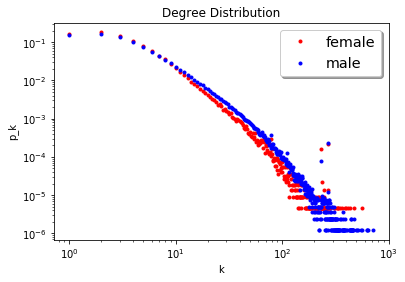

In [25]:
unique_female, counts_female = np.unique(female_degree_sequence, return_counts=True)
counts_map = np.asarray((unique_female, counts_female)).T
pdf_empirical_female = counts_map[:, 1] / np.sum(counts_map[:, 1])

unique_male, counts_male = np.unique(male_degree_sequence, return_counts=True)
counts_map = np.asarray((unique_male, counts_male)).T
pdf_empirical_male = counts_map[:, 1] / np.sum(counts_map[:, 1])

_, ax = plt.subplots()
ax.loglog(unique_female, pdf_empirical_female, 'r.', label='female')
ax.loglog(unique_male, pdf_empirical_male, 'b.', label='male')
ax.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.title('Degree Distribution')
plt.xlabel('k')
plt.ylabel('p_k')
plt.show()

In [50]:
total_degree = [node[1] for node in degree_list]
unique_total, counts_total = np.unique(total_degree, return_counts=True)

In [51]:
padded_female_counts = np.zeros_like(counts_total)
padded_female_counts[:counts_female.shape[0]] = counts_female

In [52]:
padded_female_counts = np.cumsum(padded_female_counts[::-1])[::-1]
counts_total = np.cumsum(counts_total[::-1])[::-1]

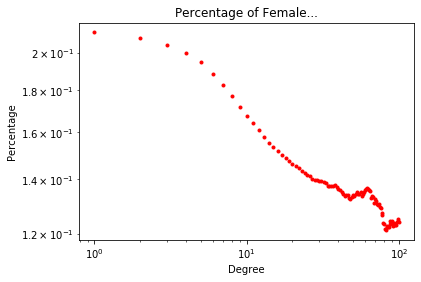

In [53]:
p = padded_female_counts / counts_total
_, ax = plt.subplots()
ax.loglog(unique_total[:100], p[:100], 'r.')
plt.title('Percentage of Female...')
plt.xlabel('Degree')
plt.ylabel('Percentage')
plt.show()
